In [1]:
#view image in breastmnist file in dataset folder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os

dfile = '../Datasets/bloodmnist.npz'
if not os.path.exists(dfile):
	raise FileNotFoundError(f"The file {dfile} does not exist.")
data_bloodmnist = np.load(dfile)

images = data_bloodmnist['train_images']

images.shape


(11959, 28, 28, 3)

In [17]:
#Exploring the bloodmnist dataset
bloodmnist_train_images = data_bloodmnist['train_images']
bloodmnist_train_labels = data_bloodmnist['train_labels']

bloodmnist_val_images = data_bloodmnist['val_images']
bloodmnist_val_labels = data_bloodmnist['val_labels']

bloodmnist_test_images = data_bloodmnist['test_images']
bloodmnist_test_labels = data_bloodmnist['test_labels']

#Summary statistics of the labels
unique, counts = np.unique(bloodmnist_train_labels, return_counts=True)
plt.bar(unique, counts)
plt.xticks(unique)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of the Labels BloodMNIST')
plt.savefig('Figures/Distribution_of_labels.png')
plt.close()

# Visualize each class of the dataset
n_classes = len(np.unique(bloodmnist_train_labels))
fig, axes = plt.subplots(3, n_classes, figsize=(20, 10))
for i in range(n_classes):
    # Select the first 3 images of each class
    class_idx = np.where(bloodmnist_train_labels == i)[0][:3]
    for j, idx in enumerate(class_idx):
        axes[j, i].imshow(bloodmnist_train_images[idx])
        axes[j, i].set_title(f'Class {i}', fontsize=25)
        axes[j, i].axis('off')
plt.suptitle('BloodMNIST Dataset', fontsize=40)
plt.savefig('Figures/BloodMNIST_Dataset.png')
plt.close()





In [3]:
# Flatten the images
bloodmnist_train_images = bloodmnist_train_images.reshape(-1, 28*28*3)
bloodmnist_val_images = bloodmnist_val_images.reshape(-1, 28*28*3)
bloodmnist_test_images = bloodmnist_test_images.reshape(-1, 28*28*3)

print(f'Train images: {bloodmnist_train_images.shape}')


Train images: (11959, 2352)


In [4]:
# Normalize the images
bloodmnist_train_images = bloodmnist_train_images / 255.0
bloodmnist_val_images = bloodmnist_val_images / 255.0
bloodmnist_test_images = bloodmnist_test_images / 255.0

In [5]:
# Train a SVC model on the dataset using various kernels
from sklearn.svm import SVC



# Create the model
svc_linear = SVC(kernel='linear')
svc_poly = SVC(kernel='poly')
svc_rbf = SVC(kernel='rbf')
svc_sigmoid = SVC(kernel='sigmoid')

kernels = { 'Linear': [svc_linear], 'Poly': [svc_poly], 'RBF': [svc_rbf], 'Sigmoid': [svc_sigmoid]}

for n in kernels:
    model = kernels[n][0]
    model.fit(bloodmnist_train_images, bloodmnist_train_labels)
    kernels[n].append(model.predict(bloodmnist_val_images))
 

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expec

Classification report for SVC with Linear kernel on Validation data:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       122
           1       0.94      0.94      0.94       312
           2       0.88      0.88      0.88       155
           3       0.64      0.73      0.68       290
           4       0.77      0.83      0.80       122
           5       0.75      0.66      0.70       143
           6       0.93      0.89      0.91       333
           7       0.99      1.00      0.99       235

    accuracy                           0.84      1712
   macro avg       0.82      0.81      0.81      1712
weighted avg       0.84      0.84      0.84      1712

Classification report for SVC with Poly kernel on Validation data:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       122
           1       0.96      0.97      0.97       312
           2       0.88      0.91      0.90       

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


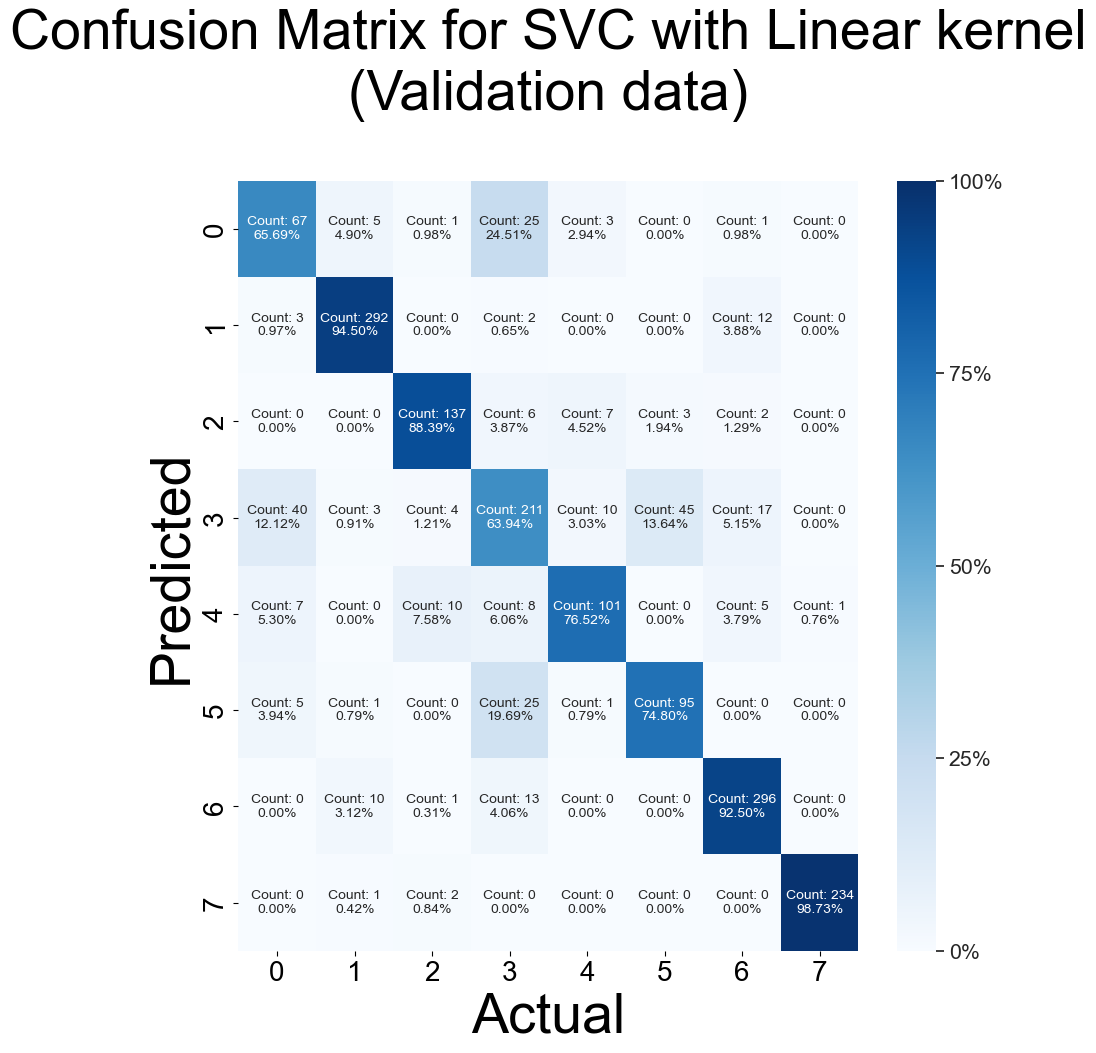

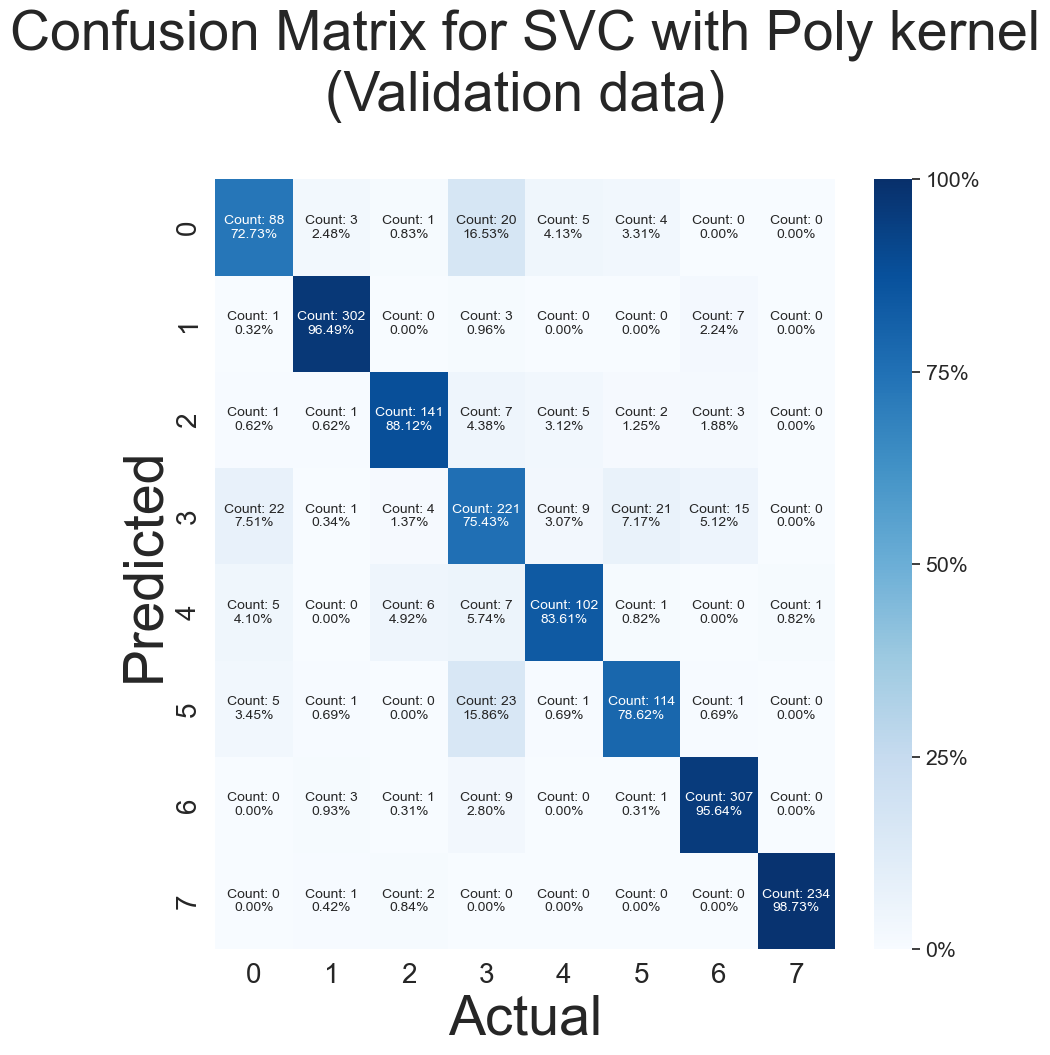

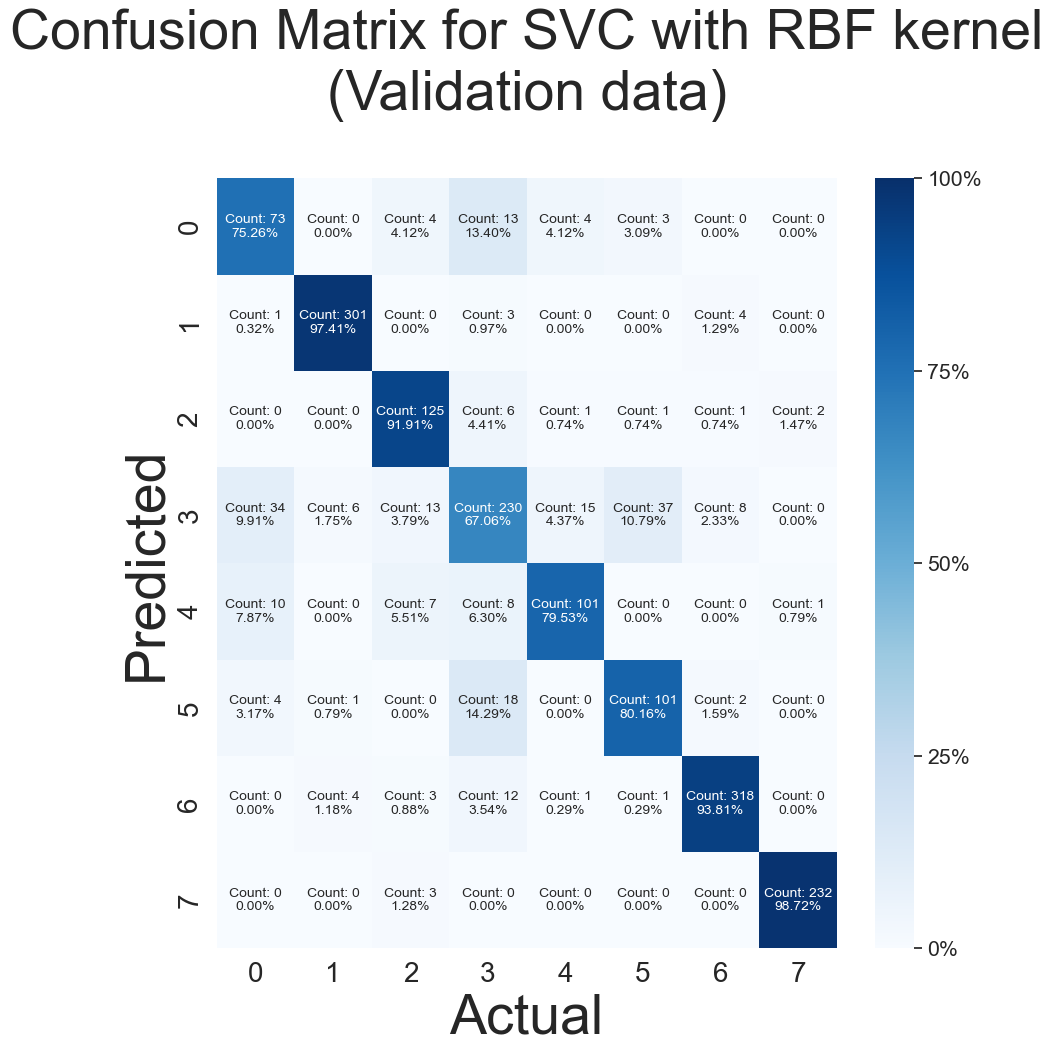

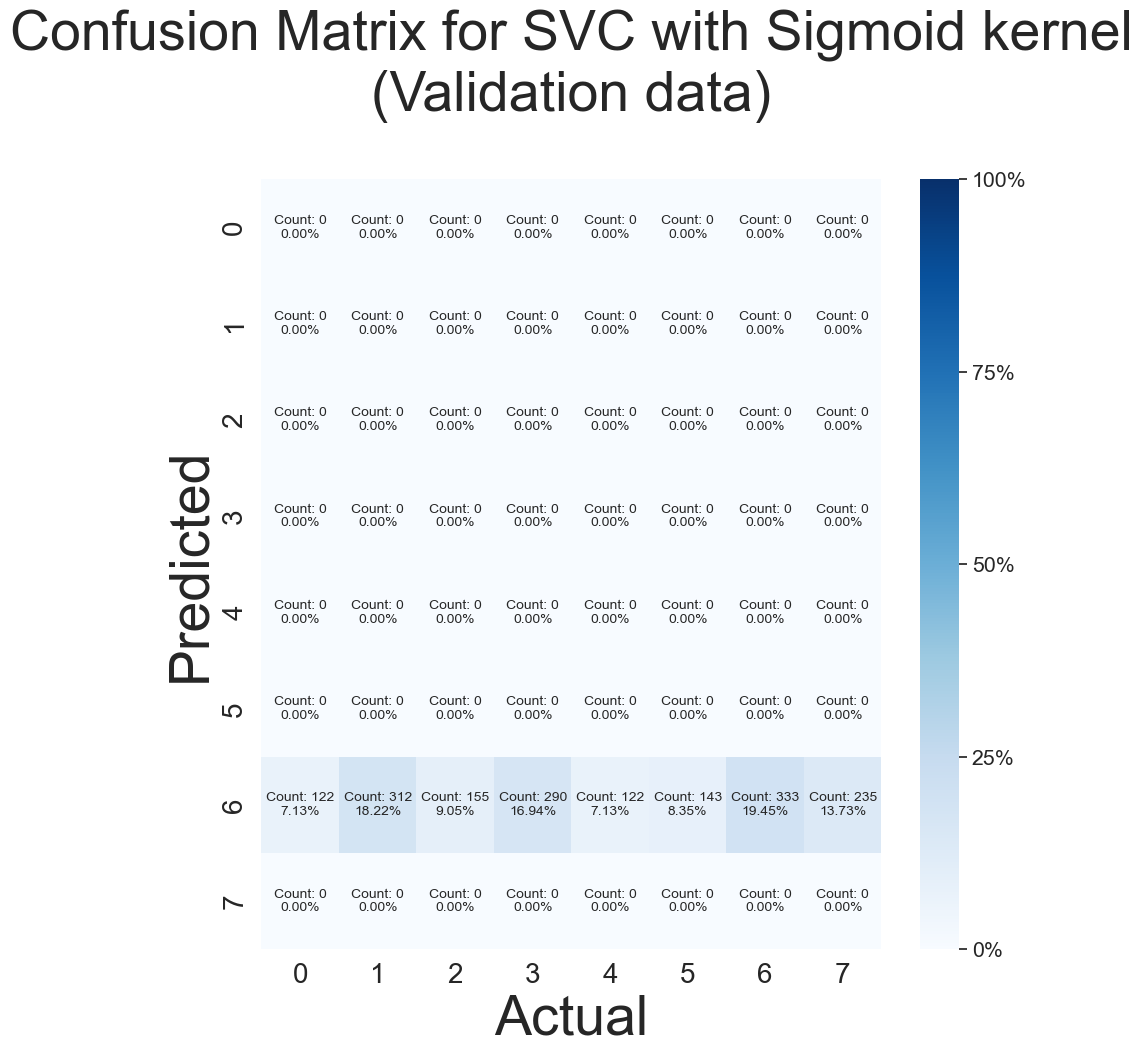

In [7]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

for n in kernels:
    model_evaluation(bloodmnist_val_labels, kernels[n][1], f'SVC with {n} kernel', 'Validation')


In [ ]:
# Tune RBF kernel and porvide additional, probablistic metrics
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10,], 'gamma': [0.01, 0.001]}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=2, scoring='f1_weighted')
grid.fit(bloodmnist_train_images, bloodmnist_train_labels)

print(grid.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from sklearn.svm import SVC
import pickle

model_filename = 'models/svc_rbf_tuned.pkl'
if os.path.exists(model_filename):
    with open(model_filename, 'rb') as file:
        svc_rbf_tuned = pickle.load(file)
else:
    svc_rbf_tuned = SVC(kernel='rbf', C=10,
                        gamma=0.01, probability=True)
    svc_rbf_tuned.fit(bloodmnist_train_images, bloodmnist_train_labels)
    with open(model_filename, 'wb') as file:
        pickle.dump(svc_rbf_tuned, file)

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:

# c 10 gamma 0.01
svc_rbf_tuned = SVC(kernel='rbf', C=10, gamma=0.01, probability=True)
svc_rbf_tuned.fit(bloodmnist_train_images, bloodmnist_train_labels)   
svc_rbf_tuned_pred_val = svc_rbf_tuned.predict(bloodmnist_val_images)

model_evaluation(bloodmnist_val_labels, svc_rbf_tuned_pred_val, 'SVC with RBF kernel (Tuned)', 'Validation')



NameError: name 'SVC' is not defined

In [26]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Predict the probabilities of the validation set
svc_rbf_tuned_pred_val_prob = svc_rbf_tuned.predict_proba(bloodmnist_val_images)

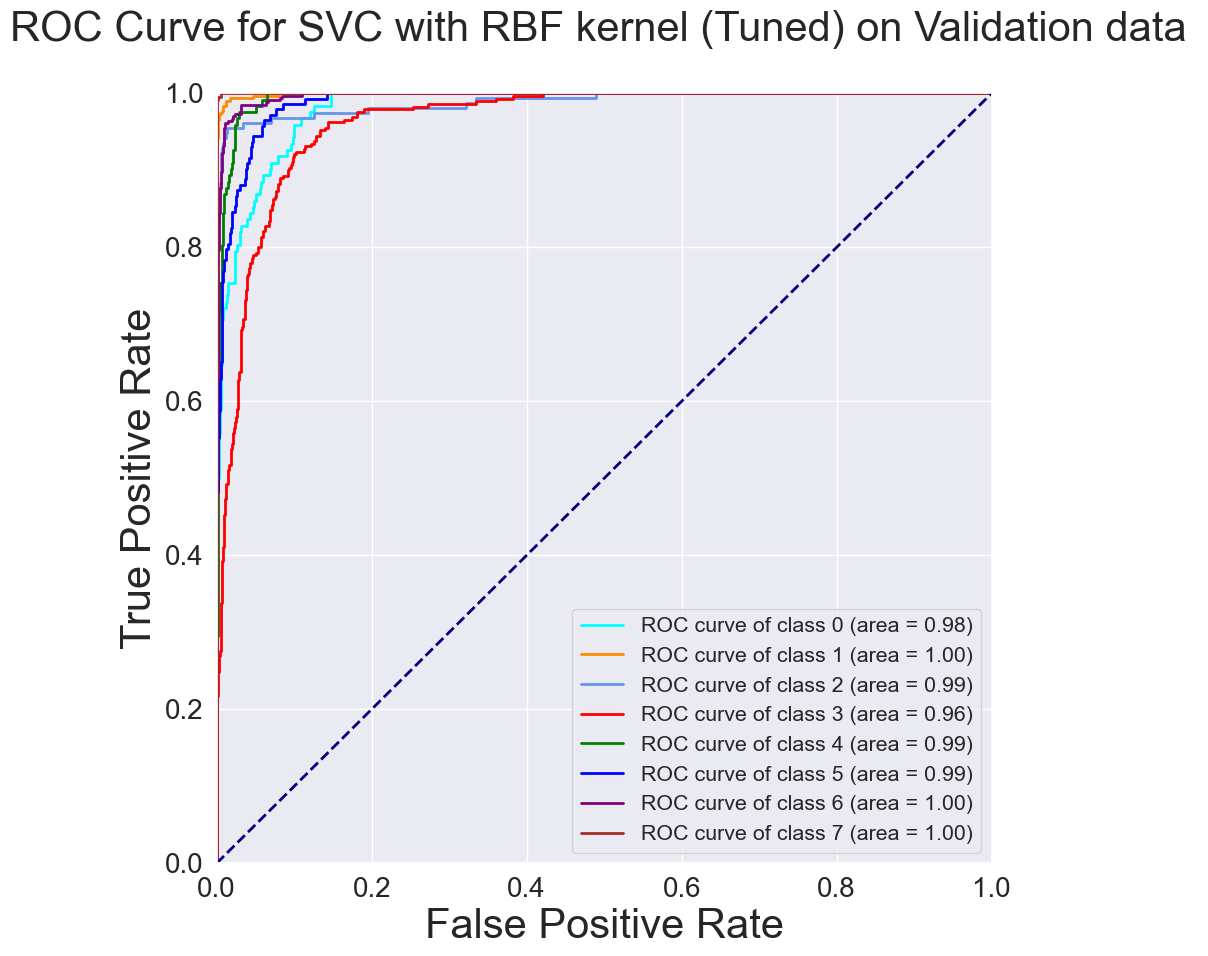

In [28]:
# Plot the results on roc curve
plot_roc_curve_multi(bloodmnist_val_labels, svc_rbf_tuned_pred_val_prob, 'SVC with RBF kernel (Tuned)', 'Validation')

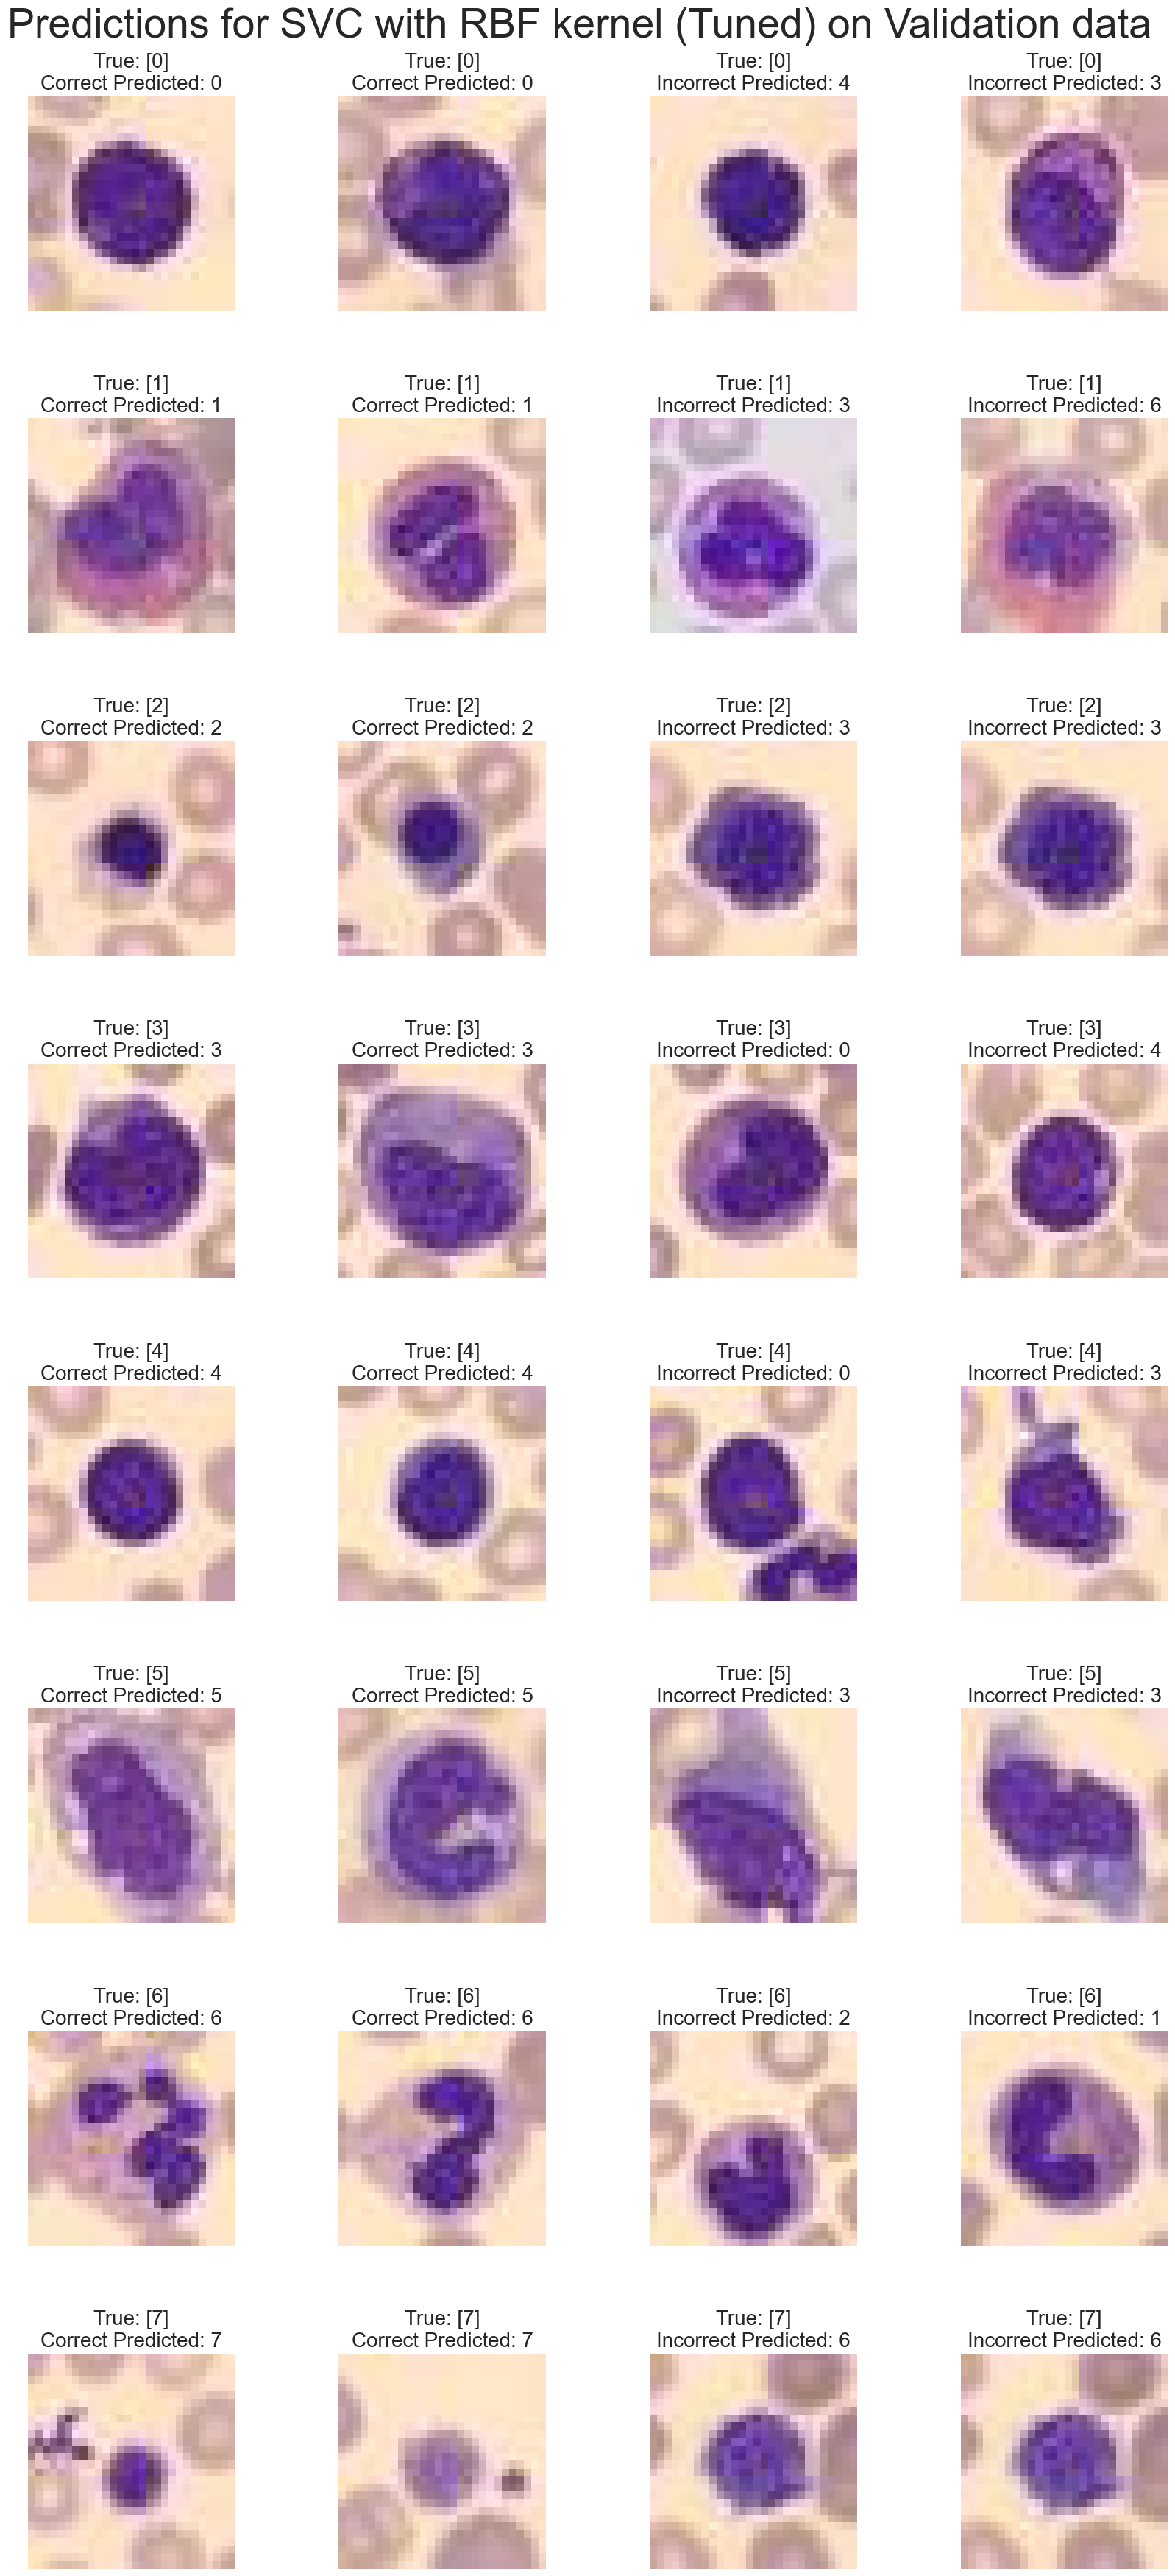

In [72]:
# Display the Incorrectly classified images
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *


display_incorrect_images(data_bloodmnist['val_images'], bloodmnist_val_labels, svc_rbf_tuned_pred_val, 'SVC with RBF kernel (Tuned)', 'Validation')

c:\Users\phili\miniconda3\envs\MLS_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for SVC with RBF kernel (Tuned) on Test data:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       244
           1       0.95      0.96      0.96       624
           2       0.91      0.88      0.90       311
           3       0.75      0.83      0.79       579
           4       0.88      0.84      0.86       243
           5       0.84      0.75      0.79       284
           6       0.93      0.92      0.92       666
           7       0.99      1.00      0.99       470

    accuracy                           0.89      3421
   macro avg       0.88      0.86      0.87      3421
weighted avg       0.89      0.89      0.89      3421



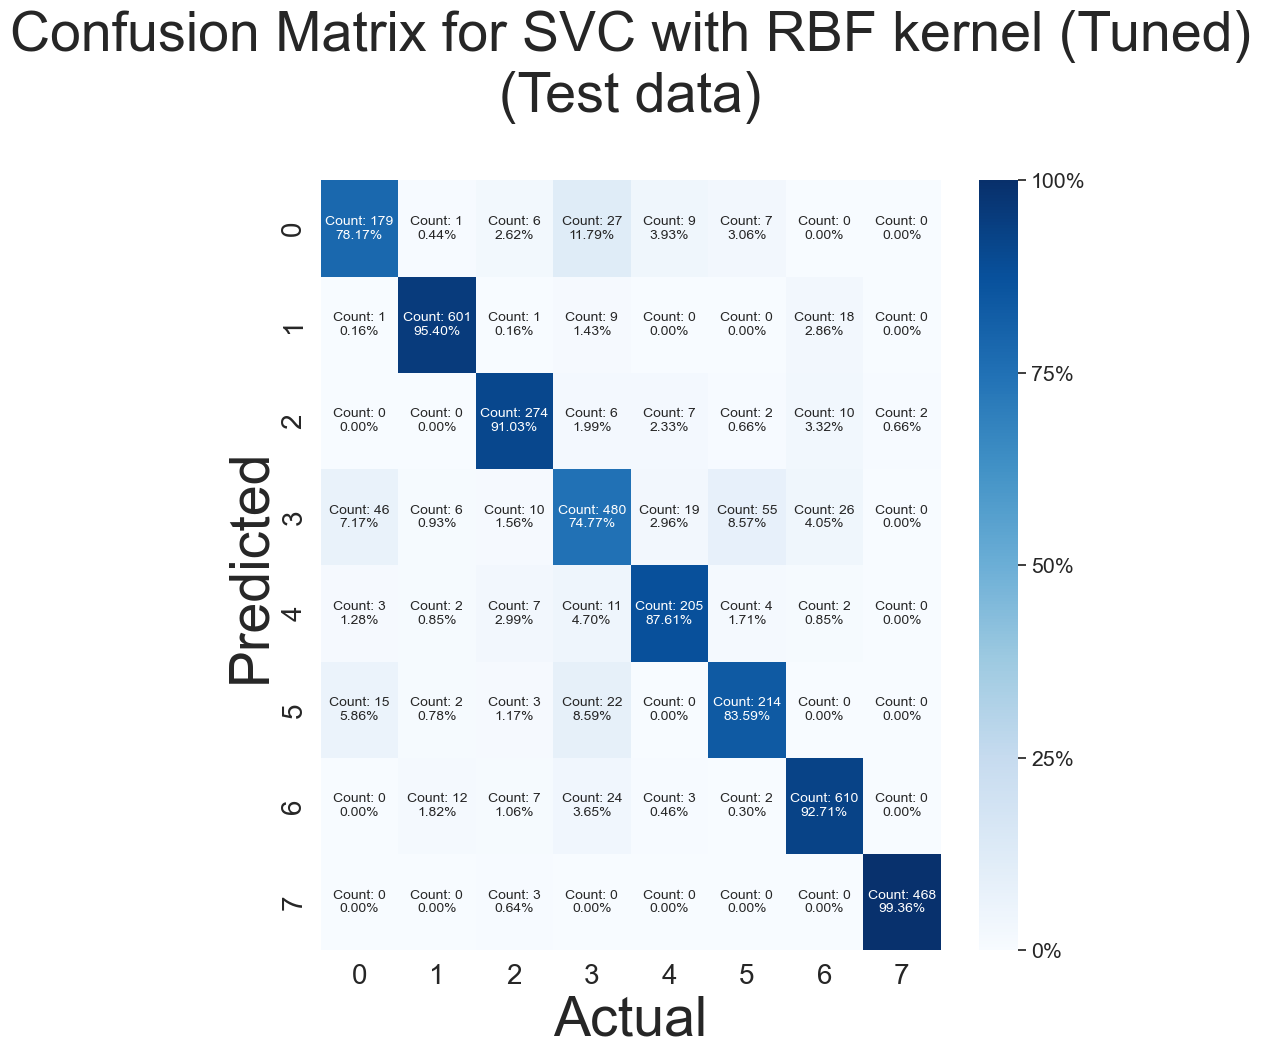

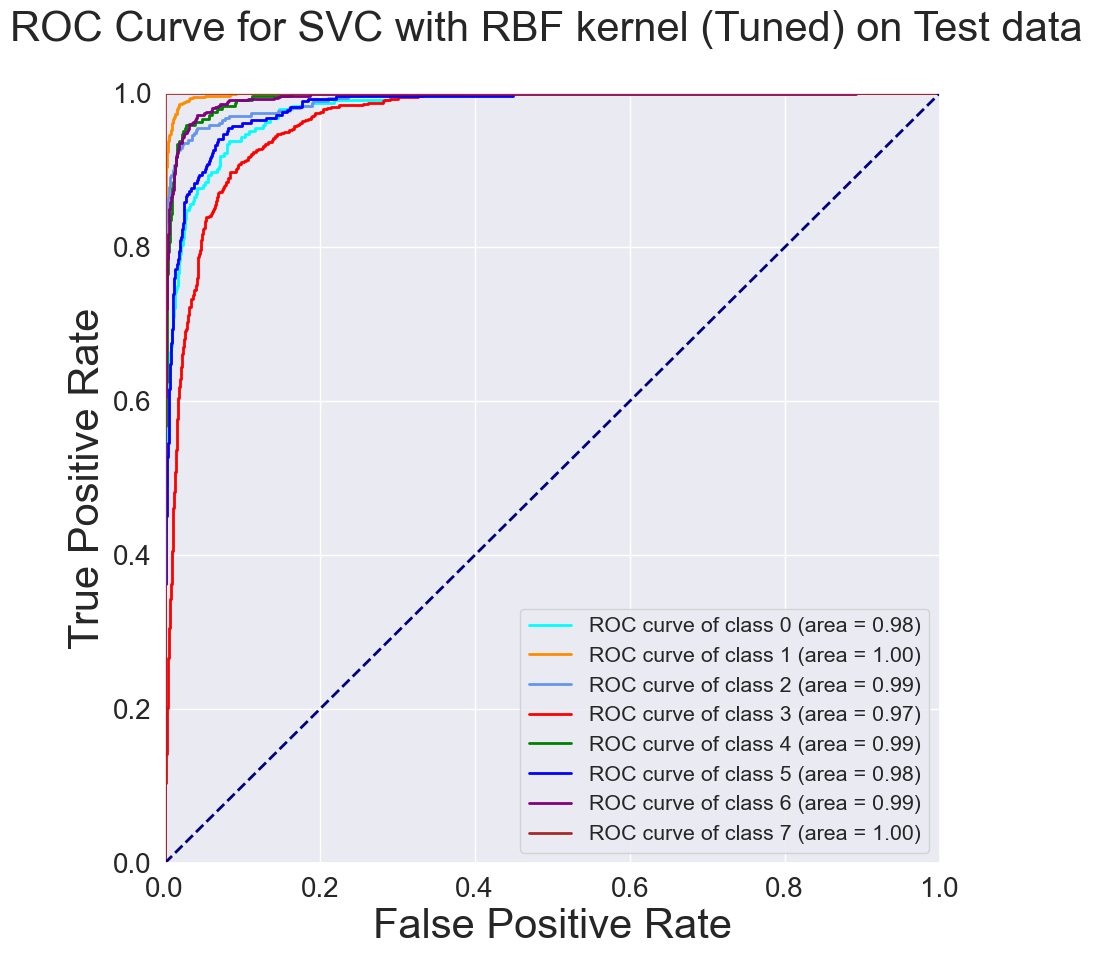

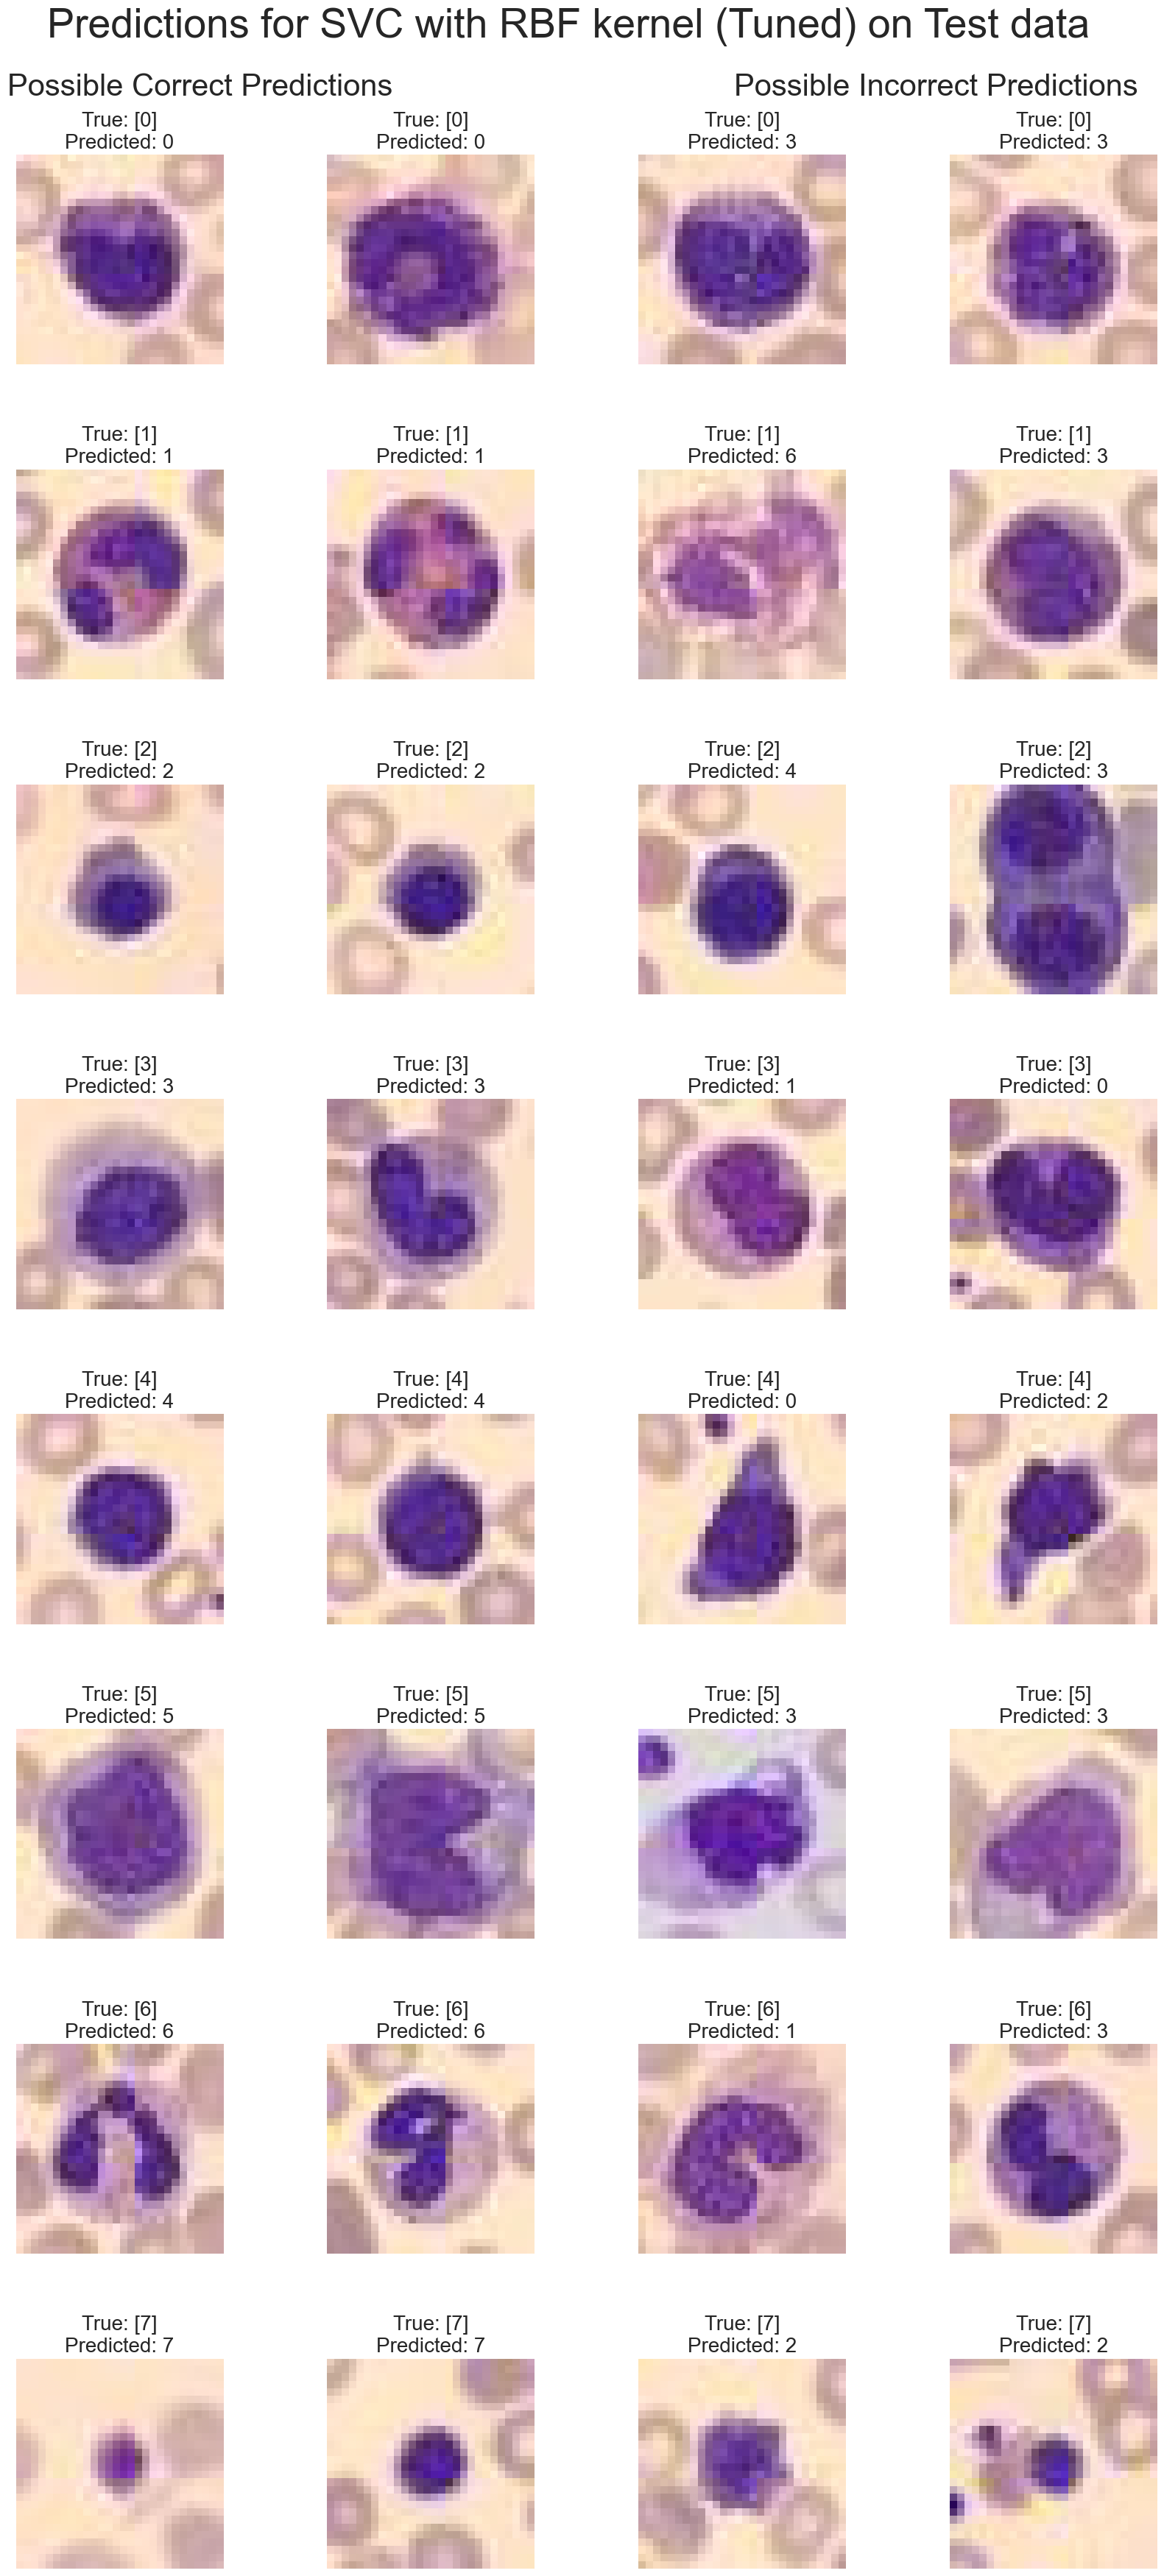

In [94]:
from sklearn.svm import SVC
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Test the model on test data 
svc_rbf_tuned = SVC(kernel='rbf', C=10, gamma=0.01, probability=True)
svc_rbf_tuned.fit(bloodmnist_train_images, bloodmnist_train_labels)  
svc_rbf_tuned_test = svc_rbf_tuned.predict(bloodmnist_test_images)
svc_rbf_tuned_test_prob = svc_rbf_tuned.predict_proba(bloodmnist_test_images)

model_evaluation(bloodmnist_test_labels, svc_rbf_tuned_test, 'SVC with RBF kernel (Tuned)', 'Test')
plot_roc_curve_multi(bloodmnist_test_labels, svc_rbf_tuned_test_prob, 'SVC with RBF kernel (Tuned)', 'Test')
display_incorrect_images(data_bloodmnist['test_images'], bloodmnist_test_labels, svc_rbf_tuned_test, 'SVC with RBF kernel (Tuned)', 'Test')

In [7]:
# Build a CNN classifier in PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.metrics import f1_score

# Define the CNN model
class BloodMnistCNN(nn.Module):
    def __init__(self, conv1_out=32, conv2_out=64, fc1_out=128):
        super(BloodMnistCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, conv1_out, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(conv1_out, conv2_out, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(conv2_out * 7 * 7, fc1_out)
        self.fc2 = nn.Linear(fc1_out, 8)
        self.conv2_out = conv2_out
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, self.conv2_out * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)
    
# Define the dataset class
class BloodMnistDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label
    
# Define the transformations
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((28, 28)),
                                transforms.ToTensor()])

# Create the dataset
train_dataset = BloodMnistDataset(data_bloodmnist['train_images'], data_bloodmnist['train_labels'], transform)
val_dataset = BloodMnistDataset(data_bloodmnist['val_images'], data_bloodmnist['val_labels'], transform)
test_dataset = BloodMnistDataset(data_bloodmnist['test_images'], data_bloodmnist['test_labels'], transform)


# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create the model
model = BloodMnistCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 500


In [10]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Initialize lists to store training and validation losses
train_losses, val_losses, _ = train_validation(model, device, train_loader, val_loader, optimizer, criterion, num_epochs)

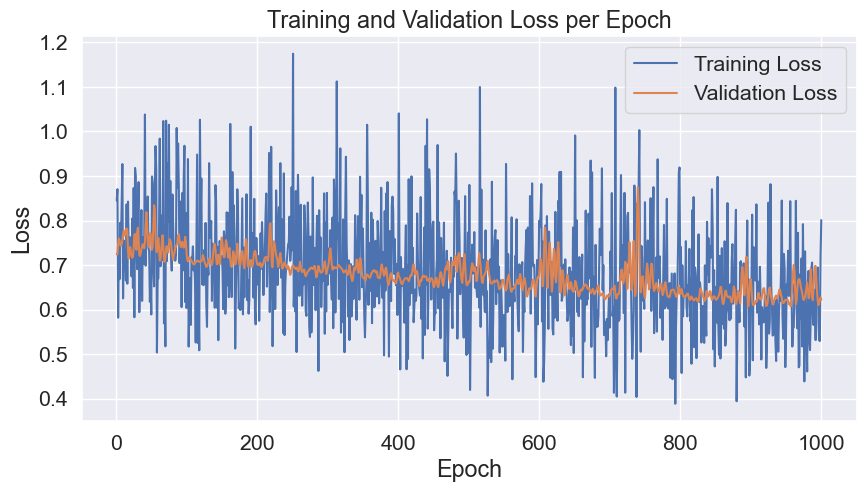

Classification report for Model on Validation data:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.77      0.91      0.83        11
           2       1.00      0.80      0.89         5
           3       0.50      0.50      0.50         4
           4       0.75      1.00      0.86         6
           5       0.71      0.83      0.77         6
           6       1.00      0.94      0.97        16
           7       0.91      1.00      0.95        10

    accuracy                           0.84        64
   macro avg       0.83      0.79      0.78        64
weighted avg       0.86      0.84      0.83        64



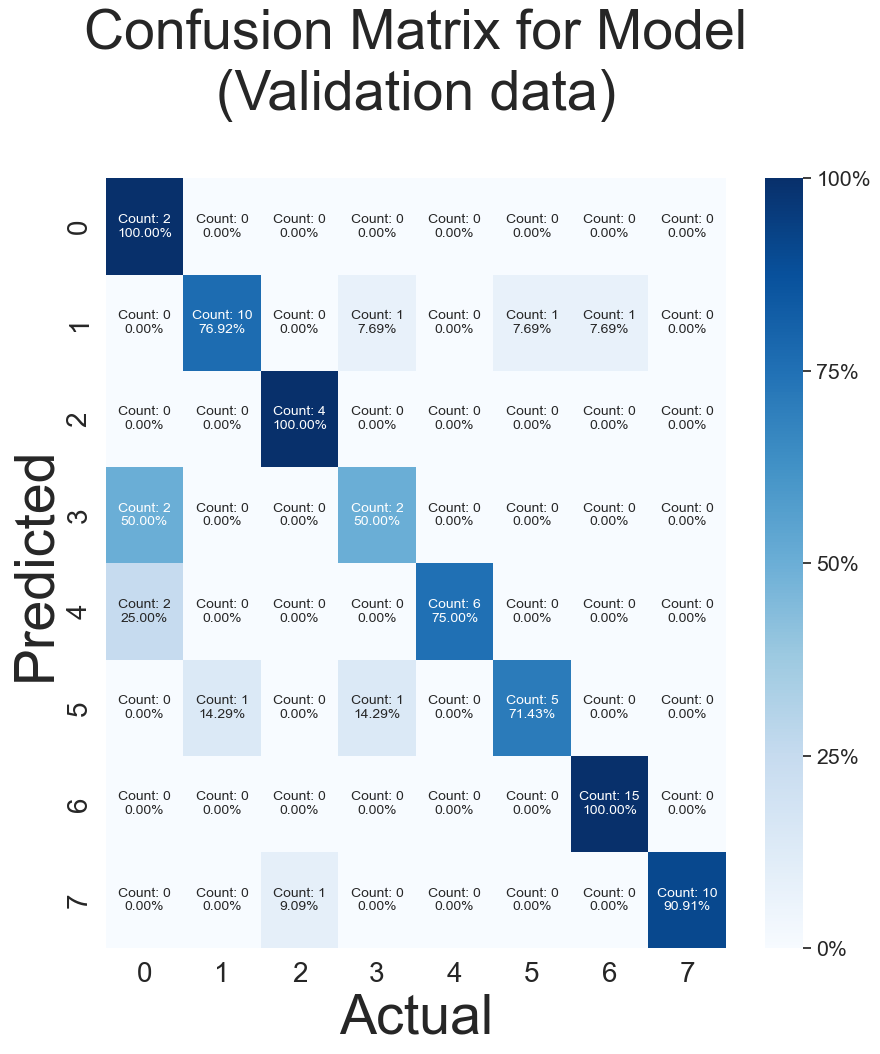

In [11]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *


plot_train_validation(model, device, val_loader, train_losses, val_losses, num_epochs)

In [ ]:
# Manually tune the hyperparameters of the CNN model

# Define the hyperparameters
conv1_out = [32, 64, 128]
conv2_out = [32, 64, 128]
fc1_out = [256, 512, 1024]
learning_rates = [0.001, 0.01]

# Initialize the best model and loss
best_model = None
best_f1 = 0

# Loop through the hyperparameters
for c1 in conv1_out:
    for c2 in conv2_out:
        for f1 in fc1_out:
            for lr in learning_rates:
                # Create the model
                model = BloodMnistCNN(conv1_out=c1, conv2_out=c2, fc1_out=f1).to(device)
                optimizer = optim.Adam(model.parameters(), lr=lr)
                criterion = nn.CrossEntropyLoss()
                num_epochs = 500
                
                # Train the model
                train_losses, val_losses, f1_score = train_validation(model, device, train_loader, val_loader, optimizer, criterion, num_epochs)
                
                # Update the best model and loss
                if f1_score > best_f1:
                    best_f1 = f1_score
                    best_model = model
                    print(f'Current Best model found with conv1_out={c1}, conv2_out={c2}, fc1_out={f1}, lr={lr}, f1_score={f1_score}')





Current Best model found with conv1_out=32, conv2_out=32, fc1_out=256, lr=0.001, f1_score=0.8323919033765881
Current Best model found with conv1_out=32, conv2_out=64, fc1_out=256, lr=0.001, f1_score=0.8348633648219782
Current Best model found with conv1_out=32, conv2_out=64, fc1_out=512, lr=0.001, f1_score=0.8543158586398023
Current Best model found with conv1_out=32, conv2_out=128, fc1_out=512, lr=0.001, f1_score=0.8657025164077955
Final Best model found with conv1_out=128, conv2_out=128, fc1_out=1024, lr=0.01, f1_score=0.8009018259651703


In [10]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *


conv1_out = 32
conv2_out = 128
fc1_out = 512
best_lr = 0.001
best_model = BloodMnistCNN(
    conv1_out=conv1_out, conv2_out=conv2_out, fc1_out=fc1_out).to(device)

# Run the best model on more epochs 
model = best_model
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 1500


# Check if the model exists
model_filename = 'models/best_CNN_model.pth'
print("Checkpoint: CNN Best")
if os.path.exists(model_filename):
    model.load_state_dict(torch.load(model_filename, weights_only=True))
    model.to(device)
else:
    # Train the model
    for _ in range(num_epochs):
        train_loss, model = train(
            model, device, train_loader, optimizer, criterion)
    torch.save(model.state_dict(), model_filename)

Checkpoint: CNN Best


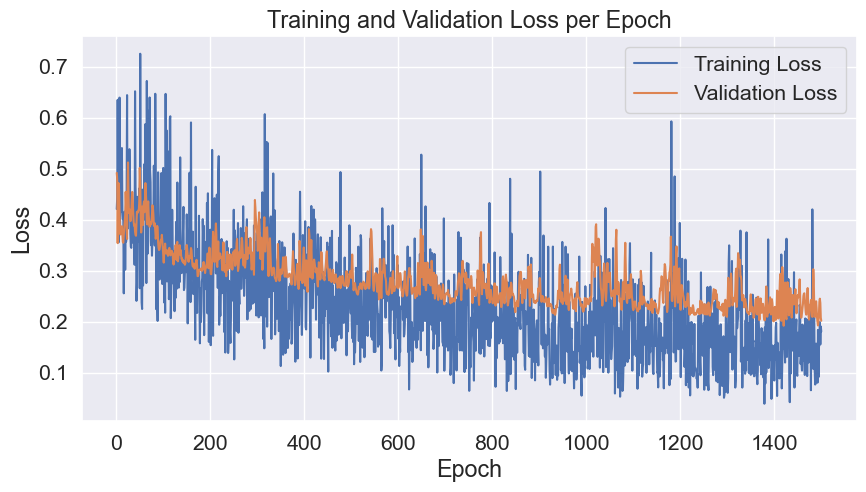

Classification report for Model on Validation data:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.80      1.00      0.89         4
           4       0.86      1.00      0.92         6
           5       0.86      1.00      0.92         6
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        10

    accuracy                           0.95        64
   macro avg       0.94      0.95      0.94        64
weighted avg       0.96      0.95      0.95        64



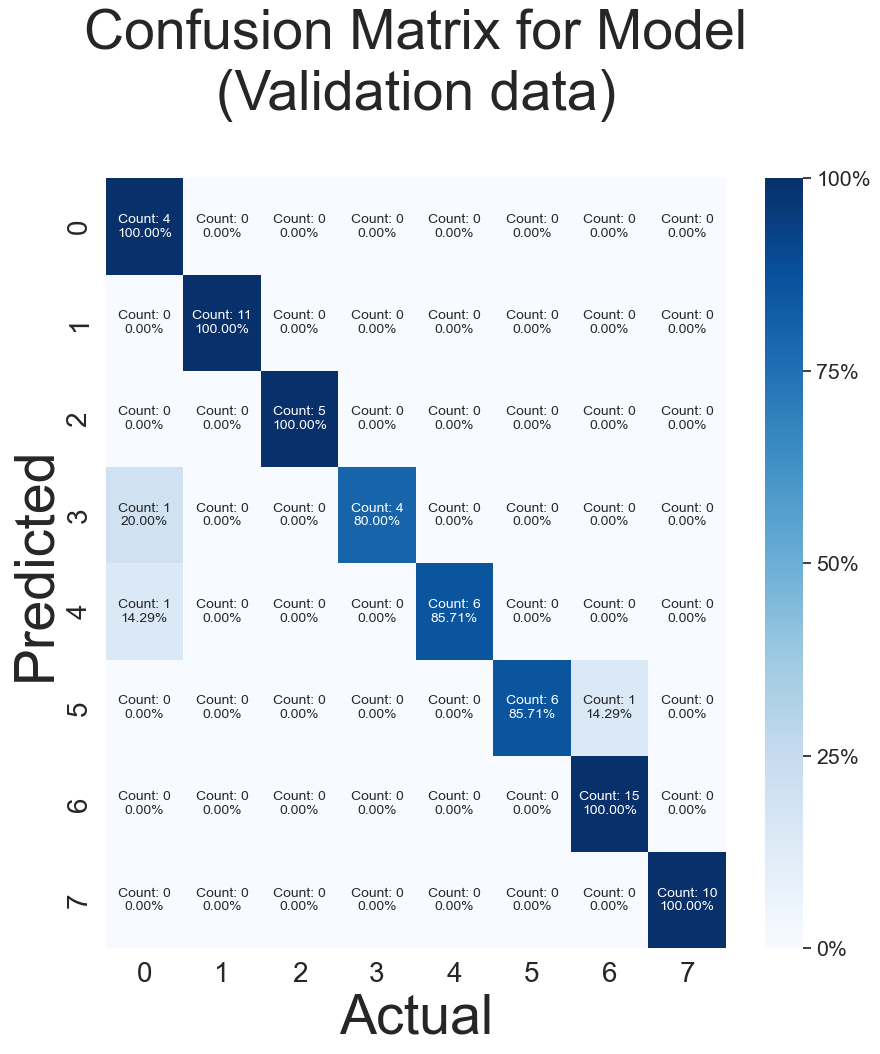

In [74]:
# Run the best model on more epochs 
model = best_model
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 1500

# Train and validate the model
train_losses, val_losses, f1_score = train_validation(model, device, train_loader, val_loader, optimizer, criterion, num_epochs)

# Plot the results
plot_train_validation(model, device, val_loader, train_losses, val_losses, num_epochs)



Classification report for Model on Test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.88      0.93      0.90        15
           2       0.75      1.00      0.86         3
           3       0.75      0.82      0.78        11
           4       0.67      1.00      0.80         4
           5       0.75      0.50      0.60         6
           6       1.00      0.80      0.89        15
           7       1.00      1.00      1.00         6

    accuracy                           0.86        64
   macro avg       0.85      0.88      0.85        64
weighted avg       0.87      0.86      0.86        64



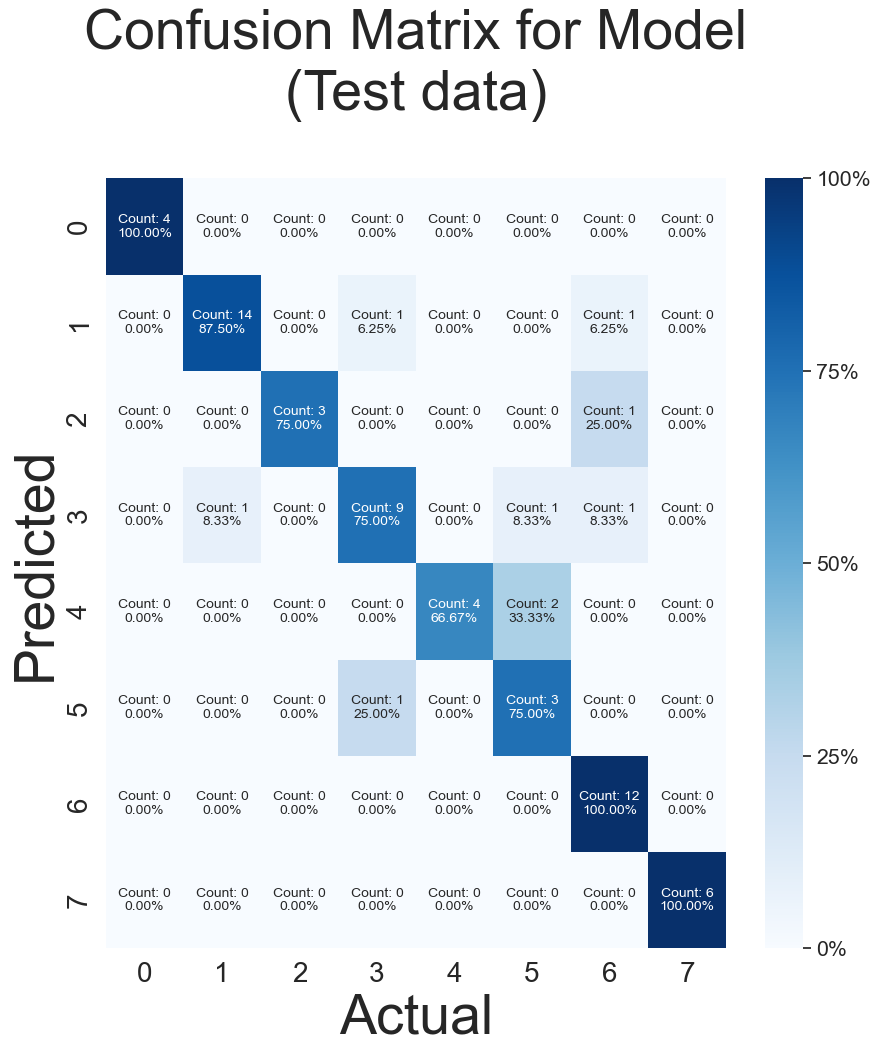

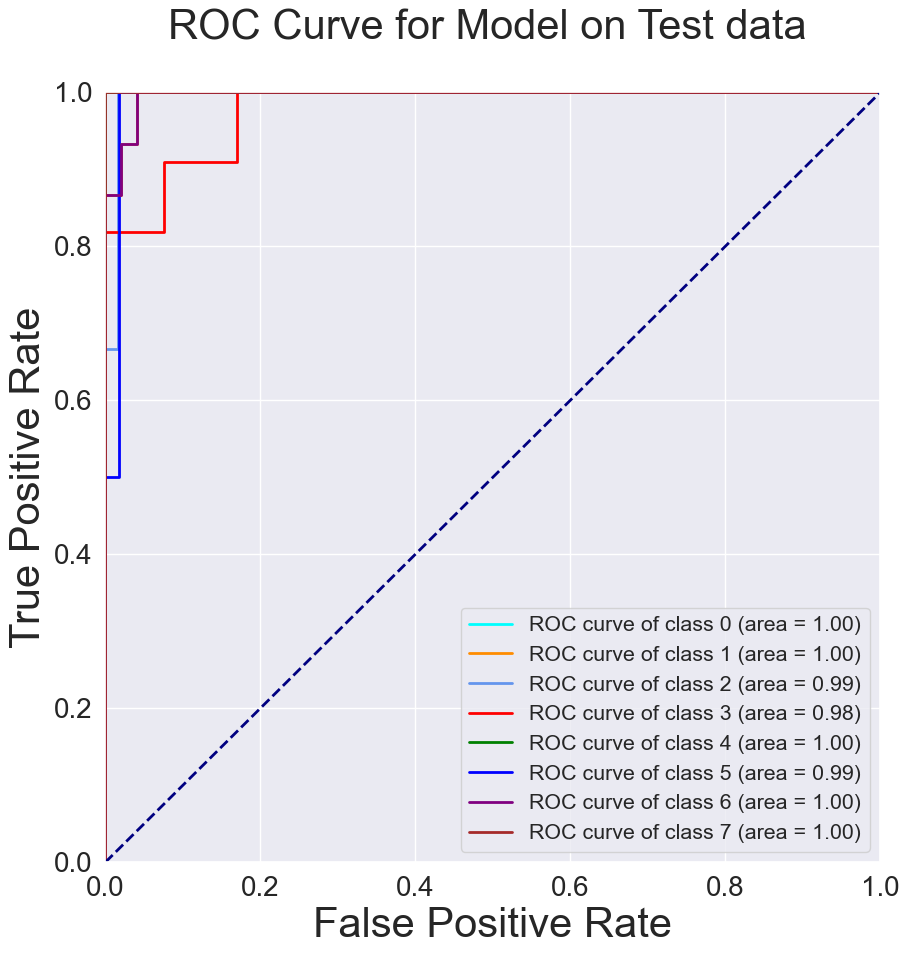

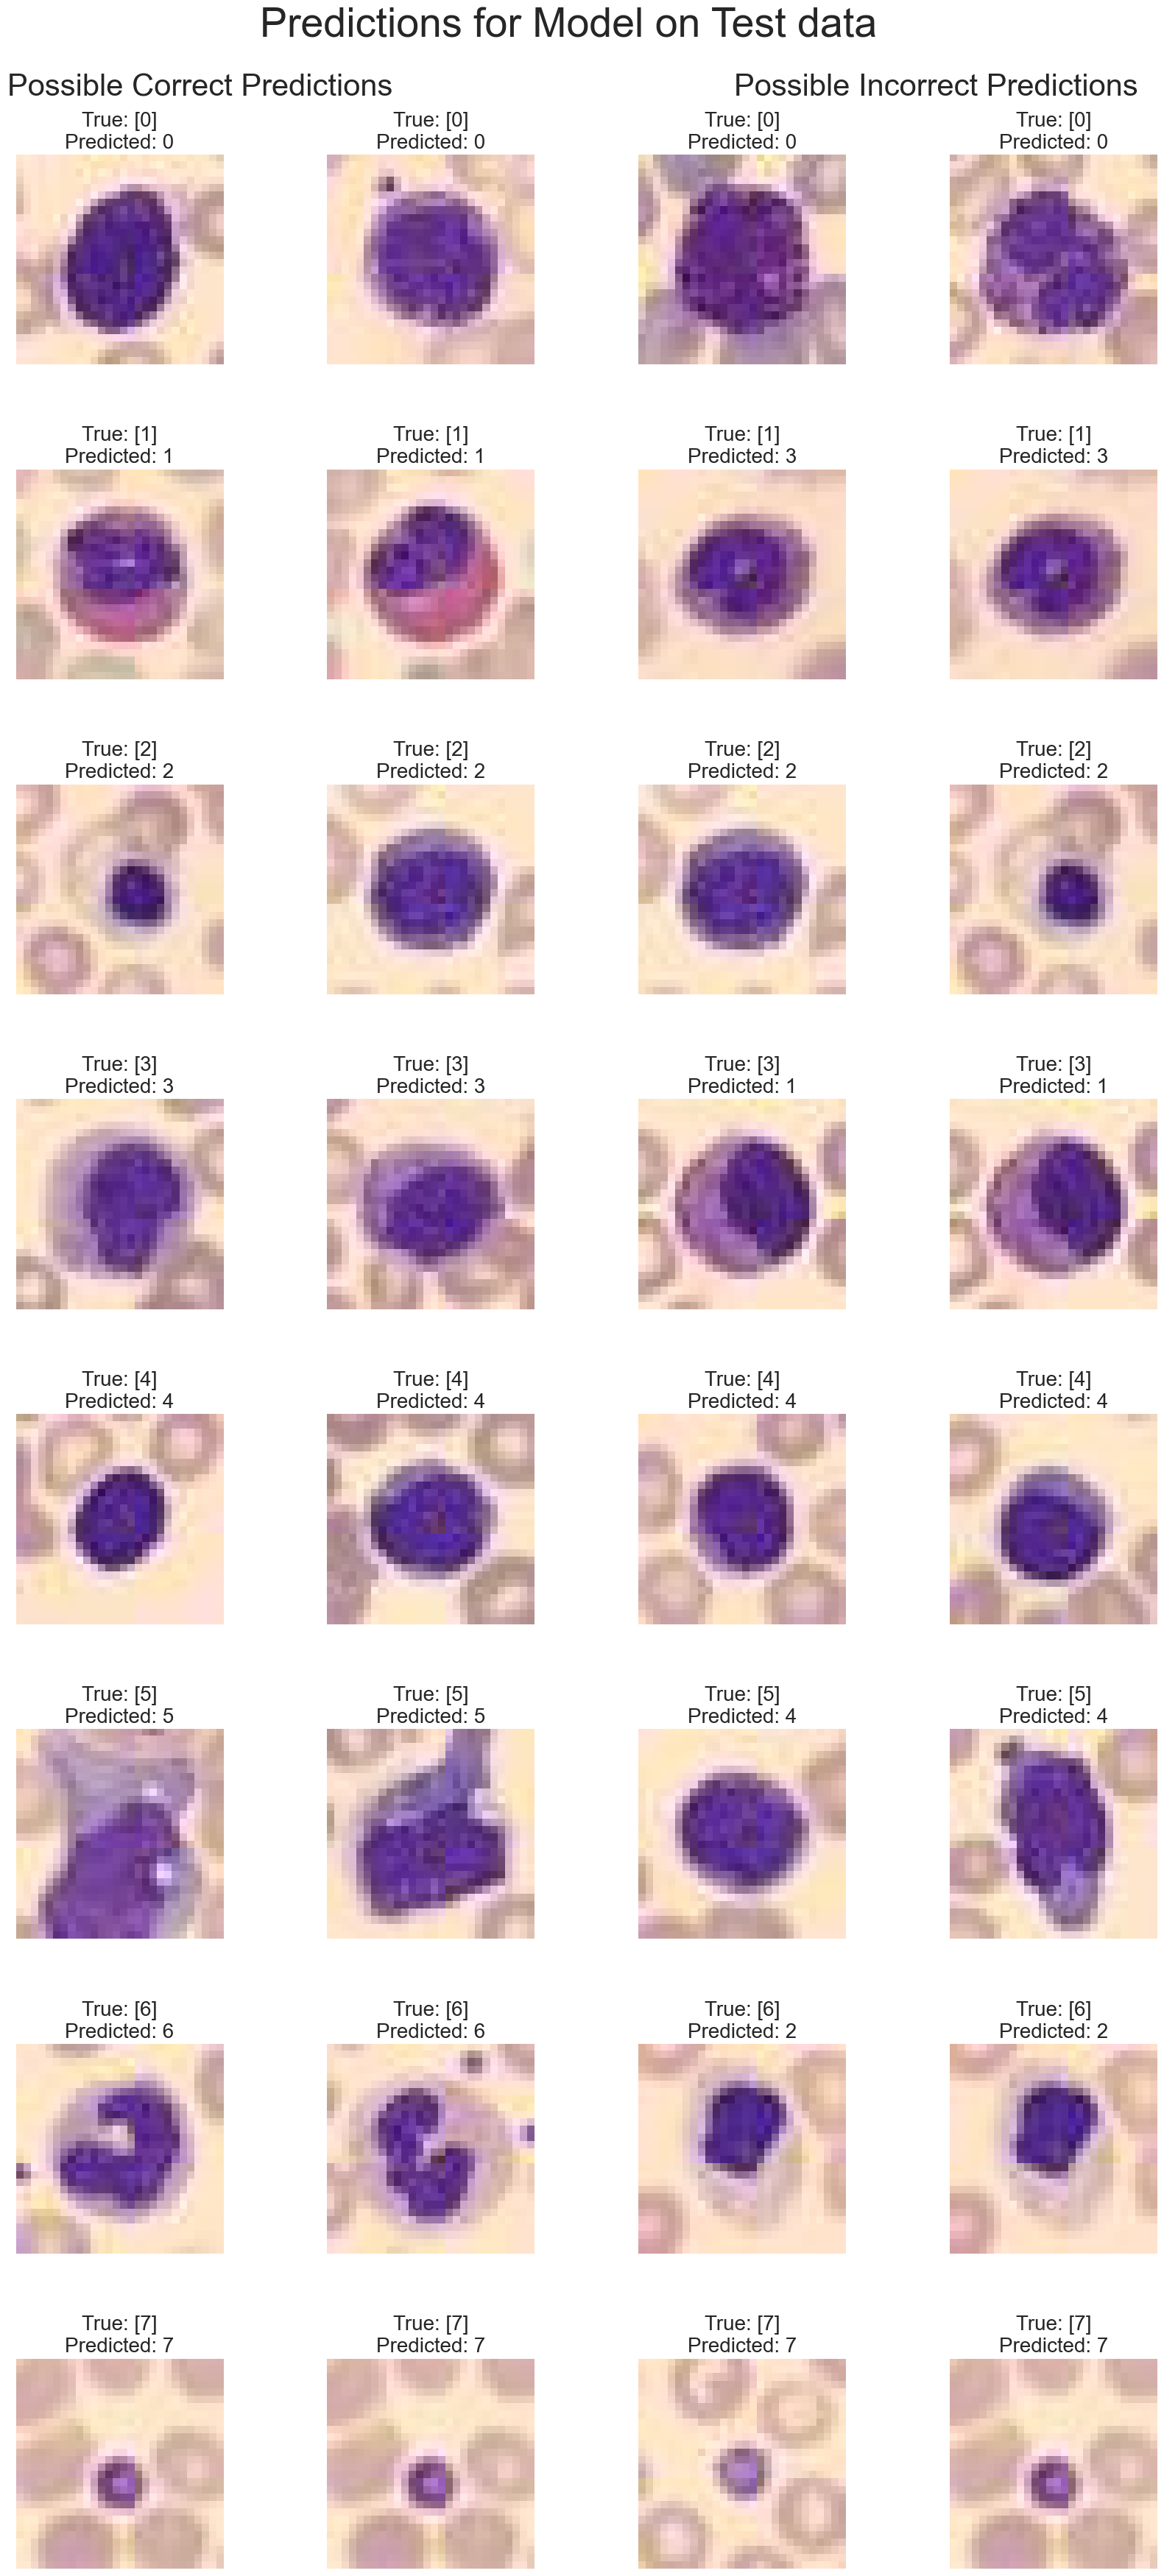

In [92]:
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# Plot the results
test_and_plot(model, device, test_loader)

